# Feature selection in R

Variable and feature selection have become the focus of much research in areas of application for which datasets with tens or hundreds of thousands of variables are available. These areas include text processing of internet documents, gene expression array analysis, and combinatorial chemistry.

When you have dataset with thousands to millions of low level features, your main goal is to select the most relevant model to build better, faster, and easier to understand learning machines.

In this notebook we will use the `caret` R package. The `caret` package (short for Classification And REgression Training) is a set of functions that attempt to streamline the process for creating predictive models. The package contains tools for feature selection, data pre-processing, splitting, estimating the output, choosing the best model... And while there are many other implementations of different models, `caret` is one of the best.

The `caret` package is so popular because it provides uniform interface for setting the parameters, model training and prediction Read the [detailed documentation](http://topepo.github.io/caret/index.html) for more information. 

As for now, let's begin selecting features with R.

-------------------

Load the `caret` package:

In [ ]:
library(caret)

In [25]:
library(mlbench)

## Determine highly correlated variables

In [30]:
'??caret:caret'

[1] "??caret:caret"

In [2]:
data(PimaIndiansDiabetes)
head(PimaIndiansDiabetes)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
1,6,148,72,35,0,33.6,0.627,50,pos
2,1,85,66,29,0,26.6,0.351,31,neg
3,8,183,64,0,0,23.3,0.672,32,pos
4,1,89,66,23,94,28.1,0.167,21,neg
5,0,137,40,35,168,43.1,2.288,33,pos
6,5,116,74,0,0,25.6,0.201,30,neg


In [3]:
summary(PimaIndiansDiabetes)

    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           mass          pedigree           age        diabetes 
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00   neg:500  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00   pos:268  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00            
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24            
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00            
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00            

In [4]:
correlation.matrix <- cor(PimaIndiansDiabetes[, 1:8])
# dim(correlation.matrix)
correlation.matrix

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age
pregnant,1.00000000,0.12945867,0.14128198,-0.08167177,-0.07353461,0.01768309,-0.03352267,0.54434123
glucose,0.12945867,1.00000000,0.15258959,0.05732789,0.33135711,0.22107107,0.13733730,0.26351432
pressure,0.14128198,0.15258959,1.00000000,0.20737054,0.08893338,0.28180529,0.04126495,0.23952795
triceps,-0.08167177,0.05732789,0.20737054,1.00000000,0.43678257,0.39257320,0.18392757,-0.11397026
insulin,-0.07353461,0.33135711,0.08893338,0.43678257,1.00000000,0.19785906,0.18507093,-0.04216295
mass,0.01768309,0.22107107,0.28180529,0.39257320,0.19785906,1.00000000,0.14064695,0.03624187
pedigree,-0.03352267,0.13733730,0.04126495,0.18392757,0.18507093,0.14064695,1.00000000,0.03356131
age,0.54434123,0.26351432,0.23952795,-0.11397026,-0.04216295,0.03624187,0.03356131,1.00000000


In [20]:
?findCorrelation

findCorrelation {caret},R Documentation
x,A correlation matrix
cutoff,A numeric value for the pair-wise absolute correlation cutoff
verbose,A boolean for printing the details
names,a logical; should the column names be returned (TRUE) or the column index (FALSE)?
exact,a logical; should the average correlations be recomputed at each step? See Details below.


In [6]:
strong.correlation.matrix <- findCorrelation(correlation.matrix, cutoff = 0.38, verbose = T)
strong.correlation.matrix

Compare row 4  and column  5 with corr  0.437 
  Means:  0.211 vs 0.169 so flagging column 4 
Compare row 8  and column  1 with corr  0.544 
  Means:  0.193 vs 0.159 so flagging column 8 
All correlations <= 0.38 


[1] 4 8

## Calculation of variable importance

In [7]:
# ?trainControl

In [8]:
# > Resampling: Cross-Validated (10 fold, repeated 3 times)
# Here we create cross-validator (method = "repeatedcv")

control <- trainControl(method = "repeatedcv", number = 10, repeats = 3)

In [9]:
# Train the model
# diabetes – target (y)
# everything else – data (X)
# method = "lqv":
# learning vector quantization (LVQ) – is a prototype-based supervised classification algorithm

model <- train(diabetes ~ ., data = PimaIndiansDiabetes, method = "lvq",
               preProcess = "scale", trControl = control)

Loading required package: class


In [10]:
model

Learning Vector Quantization 

768 samples
  8 predictor
  2 classes: 'neg', 'pos' 

Pre-processing: scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 691, 691, 692, 691, 691, 691, ... 
Resampling results across tuning parameters:

  size  k   Accuracy   Kappa    
  4      1  0.7140294  0.2994163
  4      6  0.7214058  0.3096554
  4     11  0.7135566  0.2840312
  6      1  0.7260823  0.3658820
  6      6  0.7109592  0.3134038
  6     11  0.7295512  0.3571732
  8      1  0.7330770  0.3813345
  8      6  0.7361187  0.3836046
  8     11  0.7282923  0.3616105

Accuracy was used to select the optimal model using  the largest value.
The final values used for the model were size = 8 and k = 6. 

In [11]:
# ?varImp

ROC curve variable importance

         Importance
glucose      0.7881
mass         0.6876
age          0.6869
pregnant     0.6195
pedigree     0.6062
pressure     0.5865
triceps      0.5536
insulin      0.4621


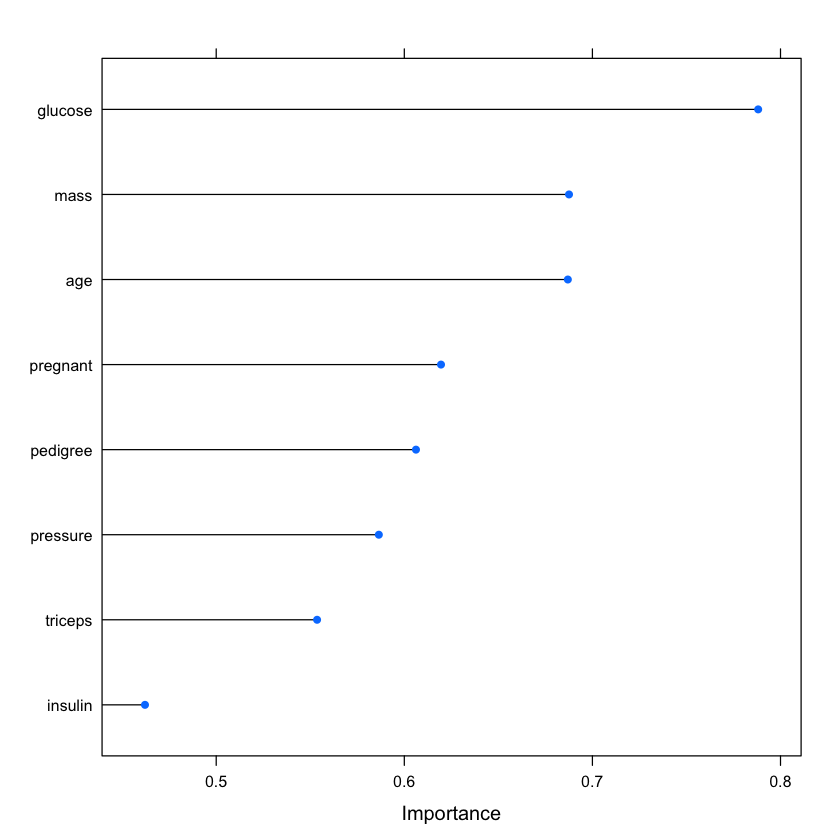

In [12]:
# > varImp – A generic method for calculating variable importance 
# for objects produced by train and method specific methods
# Here we calculate the variable importance

vars.importance <- varImp(model, scale = F)

print(vars.importance)
plot(vars.importance)

## Recursive Feature Elimination

Here's our Recursive Feature Elimination (RFE) algorithm:

![](http://topepo.github.io/caret/Algo2.png)

It's slightly different from the basic version of RFE because, as you can see, our RFE **incorporates resampling**. 

Since feature selection is part of the model building process, resampling methods (e.g. cross-validation, the bootstrap) should factor in the variability caused by feature selection when calculating performance. To get performance estimates that incorporate the variation due to feature selection, it is suggested that the steps in the basic algorithm be **encapsulated inside an outer layer of resampling**. Here we will run **cross-validation** (again) with 25 folds.

RFE with resampling is more computationally burdensome, but it can be easily parallelized (if your machine has multiple processors).

```r
# ensure the results are repeatable
set.seed(7)
# load the library
library(mlbench)
library(caret)
# load the data
data(PimaIndiansDiabetes)
# define the control using a random forest selection function
control <- rfeControl(functions=rfFuncs, method="cv", number=10)
# run the RFE algorithm
results <- rfe(PimaIndiansDiabetes[,1:8], PimaIndiansDiabetes[,9], sizes=c(1:8), rfeControl=control)
# summarize the results
print(results)
# list the chosen features
predictors(results)
# plot the results
plot(results, type=c("g", "o"))
```

In `caret`, our resampling-based algorithm is presented by function `rfe`. 

> `rfeIter` is the basic algorithm while `rfe` wraps these operations inside of resampling. To avoid selection bias, it is better to use the function `rfe` than `rfeIter`.

`rfeControl` generates a control object that can be used to specify the details of the feature selection algorithms used in this package:

* `functions = rfFuncs` – a list of functions for model fitting, prediction and variable importance (random forests),
* `method = "cv"` – the external resampling method (cross-validation),
* `number` – either the number of folds or number of resampling iterations (25 folds).

Let's create the control object `rfe.ctrl`:

In [13]:
rfe.ctrl <- rfeControl(functions = rfFuncs, method = "cv", number = 25, verbose = FALSE)

And next, we'll run the RFE algorithm!

`rfe` takes `X` (predictor variables),

In [14]:
result <- rfe(PimaIndiansDiabetes[, 1:8], PimaIndiansDiabetes[, 9], 
              sizes = c(1:8), rfeControl = rfe.ctrl)

# Show the result!
result

Warning message:
: package 'plyr' was built under R version 3.2.4Loading required package: randomForest
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin




Recursive feature selection

Outer resampling method: Cross-Validated (25 fold) 

Resampling performance over subset size:

 Variables Accuracy  Kappa AccuracySD KappaSD Selected
         1   0.7028 0.3085    0.06191  0.1487         
         2   0.7383 0.4044    0.06842  0.1577         
         3   0.7474 0.4306    0.07504  0.1639         
         4   0.7551 0.4447    0.07240  0.1675         
         5   0.7579 0.4539    0.07746  0.1683         
         6   0.7669 0.4706    0.06418  0.1430        *
         7   0.7540 0.4412    0.06913  0.1523         
         8   0.7643 0.4633    0.06573  0.1494         

The top 5 variables (out of 6):
   glucose, mass, age, pregnant, insulin


`predictors()` – this function gets **names of the selected variables** (selected by the final model, I mean).

**The final model** itself is `rfe`'s object `fit` and can be used for making predictions. In our case, it is a random forest classifier:
> `Type of random forest: classification`

And, finally, how good is our model? To answer this question, let's plot the results of cross-validation. The best subset size and resampling performance for this size are saved into `optsize` and `resample` objects respectively.

There's a convenient way to visualize performance `plot()` – a function that easily plots resampling accuracy over subset size. 

In [15]:
predictors(result)

[1] "glucose"  "mass"     "age"      "pregnant" "insulin"  "pedigree"

In [16]:
result$fit


Call:
 randomForest(x = x, y = y, importance = first) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 2

        OOB estimate of  error rate: 22.92%
Confusion matrix:
    neg pos class.error
neg 428  72   0.1440000
pos 104 164   0.3880597

In [17]:
# Get selected subset size
result$optsize

[1] 6

In [18]:
# First 6 rows of resampling results
head(result$resample)

,Variables,Accuracy,Kappa,.cell1,.cell2,.cell3,.cell4,Resample
6,6,0.7096774,0.3786192,15,5,4,7,Fold01
14,6,0.7741935,0.4506329,19,1,6,5,Fold02
22,6,0.7419355,0.4123223,17,3,5,6,Fold03
30,6,0.7096774,0.3526682,16,4,5,6,Fold04
38,6,0.8709677,0.7061611,19,1,3,8,Fold05
46,6,0.7096774,0.3526682,16,4,5,6,Fold06


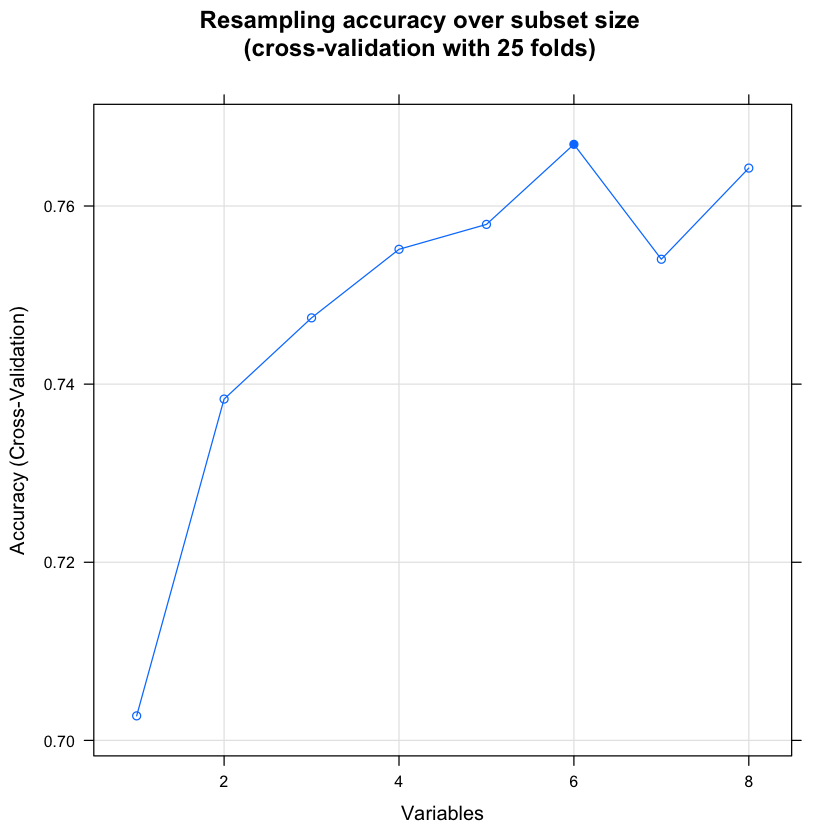

In [19]:
# Let's compare the digits with the picture
plot(result, type = c("g", "o"), 
     main = "Resampling accuracy over subset size\n(cross-validation with 25 folds)")